<a href="https://colab.research.google.com/github/habiib1999/Kmeans_Ncut_ClusteringEvaluation/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools
import random


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        centroids[i][0] = new_centroid_sum_x/float(j+1)
        centroids[i][1] = new_centroid_sum_y/float(j+1)
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size

def initializeCentroids(k,items):
    centroids = [[0 for i in range(2)] for j in range(k)] #Init centroids array
    centroids = np.array(centroids)
    print(len(centroids))
    randomIndexes = random.sample(range(0, 24), k)
    print(randomIndexes)
    for i in range(len(randomIndexes)):
      print(centroids.shape)
      print(items.shape)
      centroids[i] = items[randomIndexes[i]]
    return centroids

def KMeans(k,items):

    iterations = 0
    converge_counter = 0
    # initialize centroids
    centroids = [[] for i in range(k)]
    centroids = np.array(centroids)
    centroids = initializeCentroids(k,items)

    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      print("old centroids  = ", old_centroids)
      print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g", "c" , "m" , "y"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        for j in item_index_array:
          
          plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()
    


#Q2

In [114]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt

[[1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.

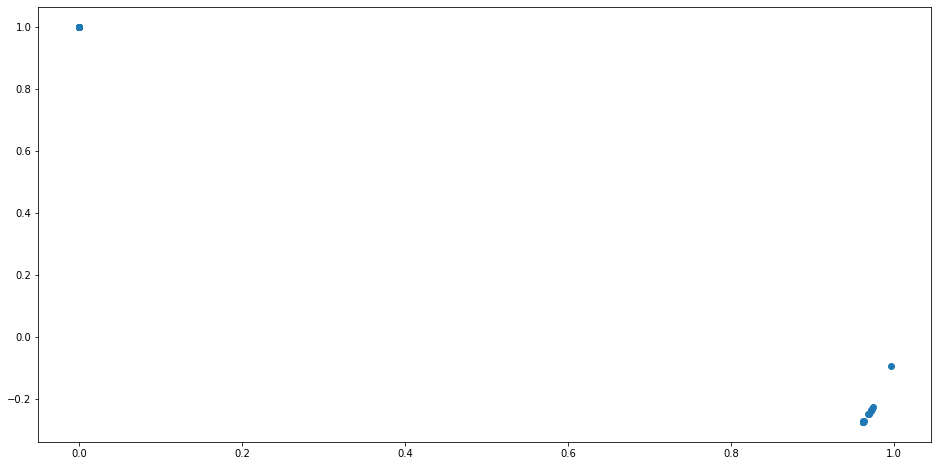

2
[23, 2]
(2, 2)
(24, 2)
(2, 2)
(24, 2)
old centroids  =  [[0 0]
 [0 1]]
new centroids  =  [[0 0]
 [0 1]]


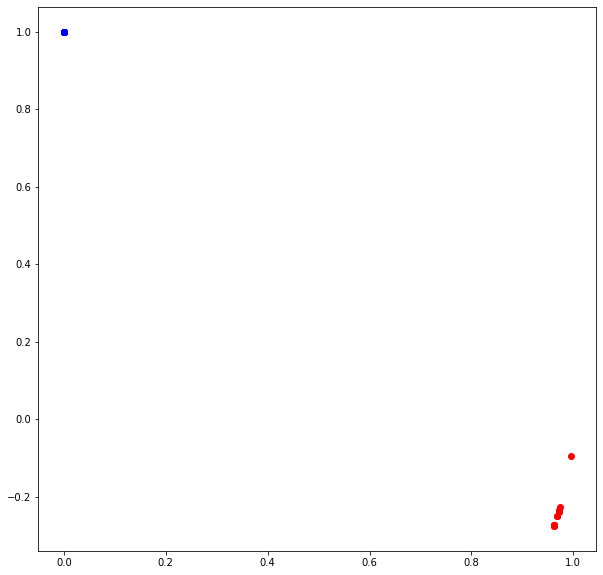

lablacian matrix :  [[ 4.  0.  0. -1.  0.  0.  0. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  5. -1.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  5.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  4.  0.  0.  0. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  6.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  6. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  5.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1.  0.  0. -1.  0.  0.  0.  5.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.  0.  0.  6.  0.  0.  0. -1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1. -1.  0.  0.  7.  0.  0.  0. -1.  0.  0.  0.  

In [122]:

items = np.array([ [ 5, 8],
                      [ 10, 8],
                      [ 11, 8],
                      [ 6, 7],
                      [ 10, 7],
                      [ 12, 7],
                      [ 13, 7],
                      [ 5, 6],
                      [ 10, 6],
                      [ 13, 6],
                      [ 6, 5],
                      [ 9, 4],
                      [ 11, 5],
                      [ 14, 6],
                      [ 15, 5],
                      [ 2, 4], 
                      [ 3, 4],
                      [ 5, 4],
                      [ 6, 4],
                      [ 7, 4],
                      [ 15, 4],
                      [ 3, 3],
                      [ 7, 3],
                      [ 8, 2] ] ,dtype = object)

knnGraph = kneighbors_graph(items, 4, mode='connectivity', include_self=True)

similarityMatrix = np.array(knnGraph.toarray())
print(similarityMatrix)
# CALCULATE DEGREE MATRIX
degree = np.zeros(len(similarityMatrix)) 
# calculate the sums along rows and sum along columns
colsum = similarityMatrix.sum(axis=0)
rowsum = similarityMatrix.sum(axis=1)
print("column sum :",colsum)
print("row sum :",rowsum)

# loop through matrix and add up all degree connections
for j in range(0, len(similarityMatrix)):
    degree[j] = colsum[j] + rowsum[j] -1

# get the diagonal entries to correct the for loop oversumming
A = similarityMatrix.diagonal()
d = A.flat
diagMat = list(d)
degreeMatrix = np.diag(degree - diagMat)

# print the degree of connectivity matrix 
print( degreeMatrix )

# CALCULATE LABLACIAN MATRIX
L = degreeMatrix - similarityMatrix
degreeMatrixInverse = np.linalg.inv(degreeMatrix)
La = np.matmul(degreeMatrix,L)




value, vector = LA.eig(La)
print(f"eigenValue:\n{np.diag(value)}\n")
print(f"eigenVector:\n{vector}\n")


 # Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(value[i]), vector[:,i]) for i in range(len(value))]
# Sort the (eigenvalue, eigenvector) 
eig_pairs.sort(key=lambda x: x[0], reverse=False)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
print(f"eigen pairs value & vector ordered:\n{eig_pairs}\n")

#for i in range(k)
#eigenVector_1 = eig_pairs[0][1].reshape(24,1)
#eigenVector_2 = eig_pairs[1][1].reshape(24,1)
eigenVector_1 = eig_pairs[0][1]
eigenVector_2 = eig_pairs[1][1]
eigenvector = np.column_stack((eigenVector_1,eigenVector_2 ))
print("NEW EIGEN : ",eigenvector)
for i in range(len(eigenvector)):
  eigenvector[i] = eigenvector[i]/np.linalg.norm(eigenvector[i])
print("NORMALIZED EIGEN : ", eigenvector)


plt.figure(figsize=(16, 8))
plt.scatter(eigenvector[:,0], eigenvector[:,1])
plt.show()
KMeans(2,eigenvector)

# test






print("lablacian matrix : ", L)
print("La matrix : ", La)


In [ ]:
###_Main_###
def main():
    items = np.array([ [ 5, 8],
                      [ 10, 8],
                      [ 11, 8],
                      [ 6, 7],
                      [ 10, 7],
                      [ 12, 7],
                      [ 13, 7],
                      [ 5, 6],
                      [ 10, 6],
                      [ 13, 6],
                      [ 6, 5],
                      [ 9, 4],
                      [ 11, 5],
                      [ 14, 6],
                      [ 15, 5],
                      [ 2, 4], 
                      [ 3, 4],
                      [ 5, 4],
                      [ 6, 4],
                      [ 7, 4],
                      [ 15, 4],
                      [ 3, 3],
                      [ 7, 3],
                      [ 8, 2] ] ,dtype = object)
    k = [2,3,4,5,6] 
    print('origional points :')
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(items[:, 0], items[:, 1])
    plt.show()

    centroids = np.array( [ items[0],
                            items[10],
                            items[21] ] ,dtype = object)
    
    k = [2,3,4,5,6] 
    for n in k:
        KMeans(n,items)
        #Ncuts(n,items)



if __name__ == "__main__":
    main();